In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##reading data
data=pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
##data shape
data.shape

(299, 13)

In [7]:
##null value percentage check
round(100*(data.isnull().sum()/data.shape[0]),2)

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
##checking target count
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### so we have a class imbalance problem here
### let's do some visualization also to better understand the data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


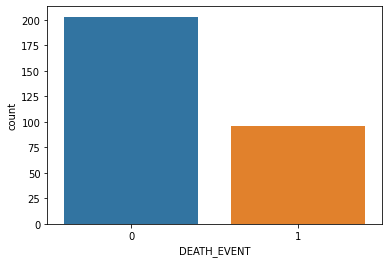

In [10]:
sns.countplot(data['DEATH_EVENT'])
plt.show()

In [11]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:>

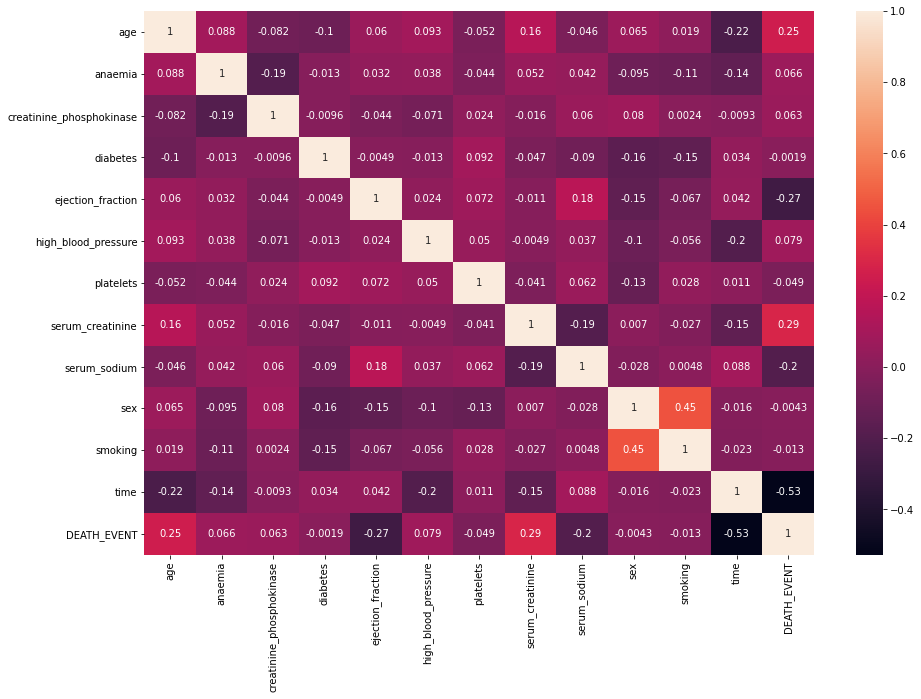

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


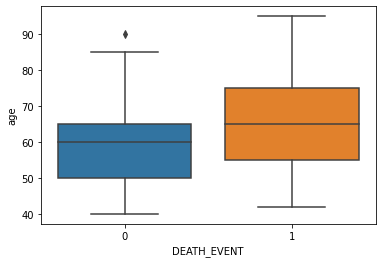

In [13]:
sns.boxplot(data['DEATH_EVENT'],data['age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


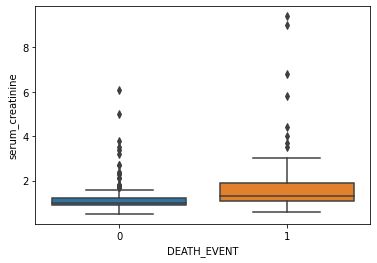

In [14]:
sns.boxplot(data['DEATH_EVENT'],data['serum_creatinine'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

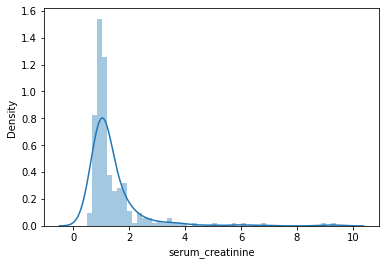

In [15]:
sns.distplot(data['serum_creatinine'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='serum_creatinine'>

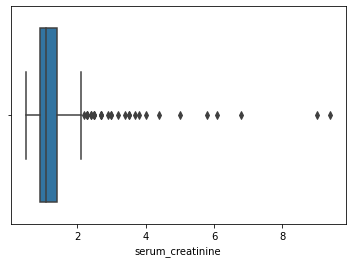

In [16]:
sns.boxplot(data['serum_creatinine'])

In [17]:
data['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

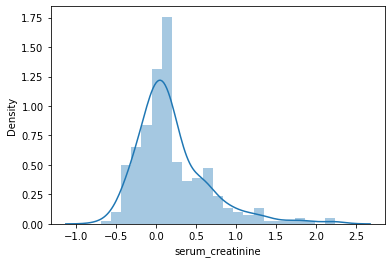

In [18]:
sns.distplot(np.log(data['serum_creatinine']))

In [19]:
data['serum_creatinine']=np.log(data['serum_creatinine'])

In [20]:
data.shape

(299, 13)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

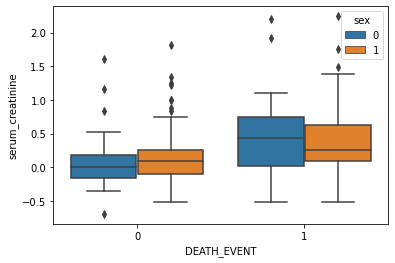

In [21]:
sns.boxplot(data['DEATH_EVENT'],data['serum_creatinine'],hue=data['sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

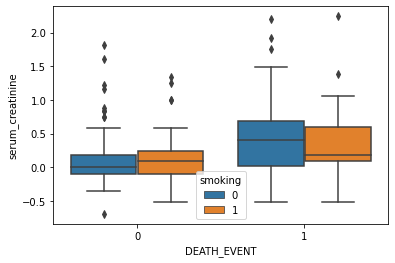

In [22]:
sns.boxplot(data['DEATH_EVENT'],data['serum_creatinine'],hue=data['smoking'])

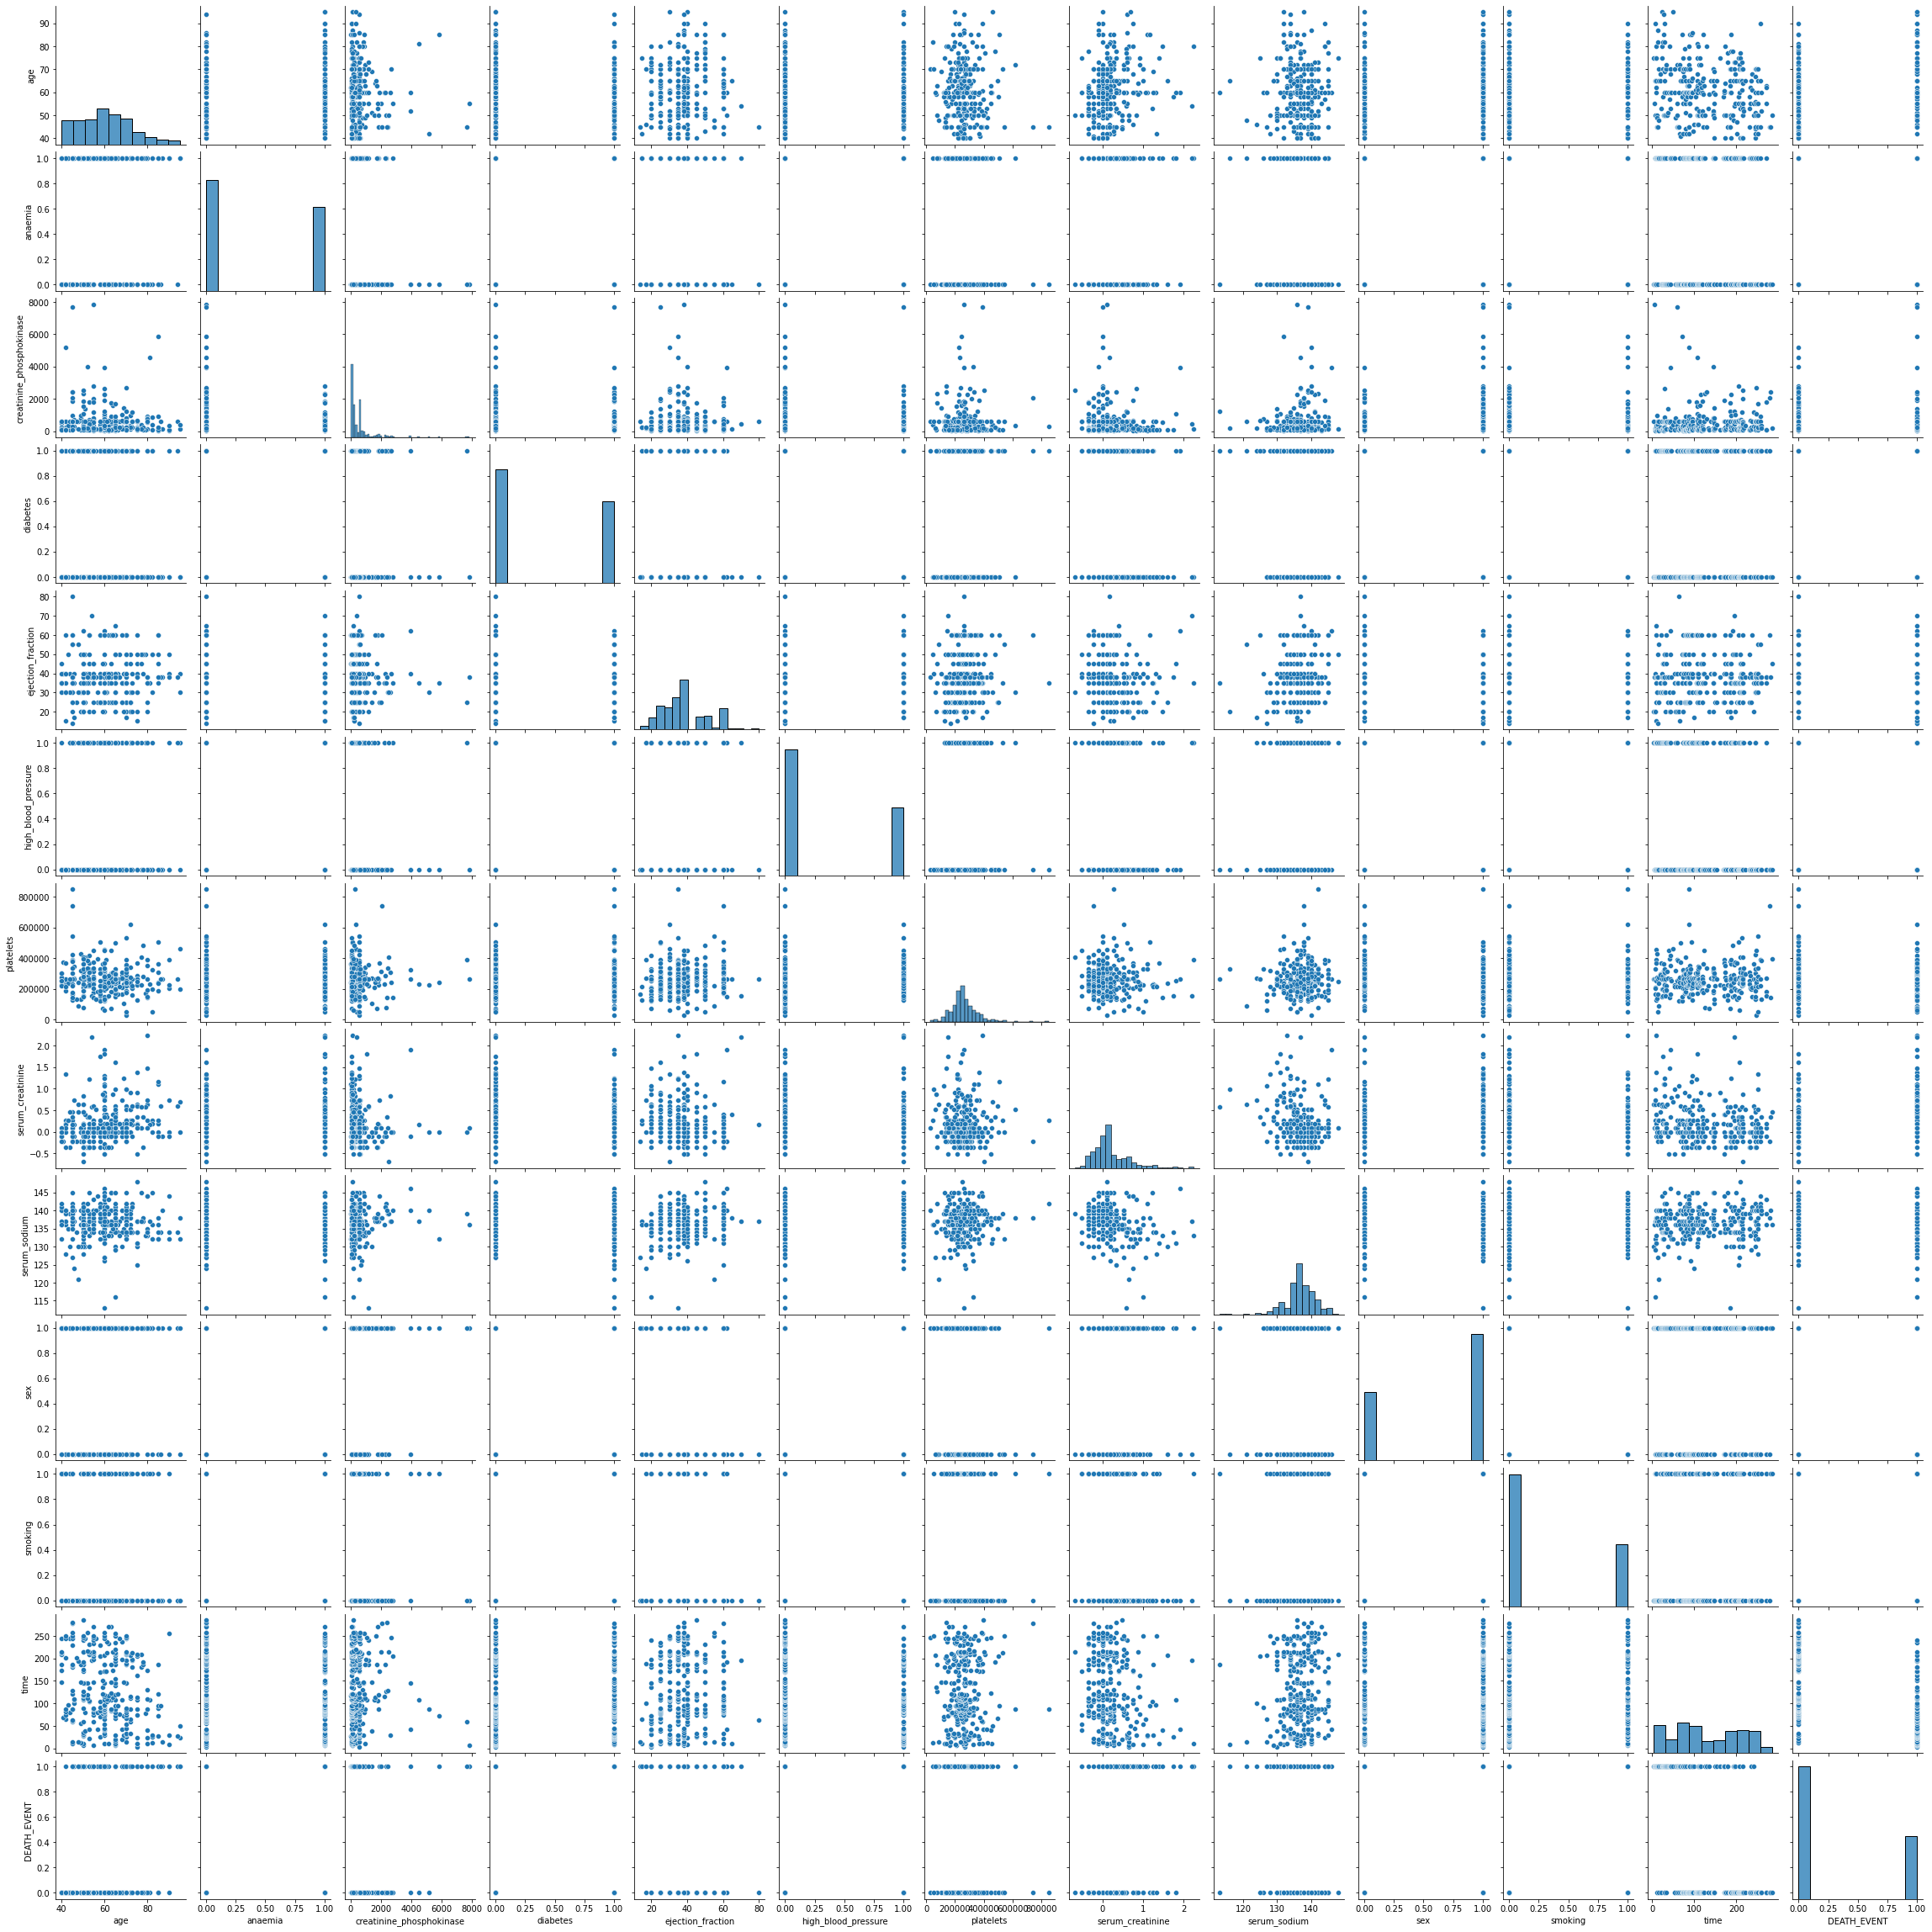

In [23]:
sns.pairplot(data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='platelets'>

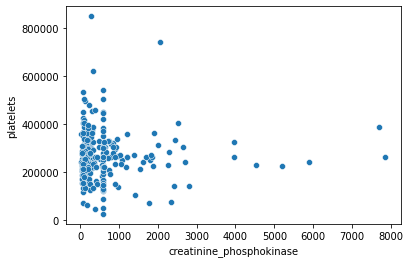

In [24]:
sns.scatterplot(data['creatinine_phosphokinase'],data['platelets'])

In [25]:
##X,y split
X=data.drop('DEATH_EVENT',axis=1)

In [26]:
X.shape

(299, 12)

In [27]:
y=data['DEATH_EVENT']

In [28]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((239, 12), (60, 12), (239,), (60,))

In [31]:
y_train.value_counts() , y_test.value_counts()

(0    168
 1     71
 Name: DEATH_EVENT, dtype: int64,
 0    35
 1    25
 Name: DEATH_EVENT, dtype: int64)

## lets handle class imbalance

In [32]:
!pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE
smk=SMOTE(random_state=42)
X_train_res,y_train_res=smk.fit_resample(X_train,y_train)

In [34]:
y_train.value_counts()

0    168
1     71
Name: DEATH_EVENT, dtype: int64

In [35]:
y_train_res.value_counts()

1    168
0    168
Name: DEATH_EVENT, dtype: int64

In [36]:
##scaling
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train_res)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_train.shape,X_test.shape,y_train_res.shape

((336, 12), (60, 12), (336,))

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log1=LogisticRegression()

In [43]:
log1.fit(X_train,y_train_res)

LogisticRegression()

In [44]:
y_test_pred=log1.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(y_test,y_test_pred)

0.75

In [47]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[31,  4],
       [11, 14]])

In [48]:
metrics.roc_auc_score(y_test,y_test_pred)

0.7228571428571429

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.56      0.78      0.65        18

    accuracy                           0.75        60
   macro avg       0.72      0.76      0.73        60
weighted avg       0.79      0.75      0.76        60



## DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_leaf=25)

In [53]:
dtc.fit(X_train,y_train_res)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25)

In [54]:
y_test_pred=dtc.predict(X_test)

In [55]:
metrics.accuracy_score(y_test_pred,y_test)

0.8

In [56]:
metrics.confusion_matrix(y_test_pred,y_test)

array([[30,  7],
       [ 5, 18]])

In [57]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.72      0.78      0.75        23

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



In [58]:
metrics.roc_auc_score(y_test_pred,y_test)

0.7967097532314923

## Hyperparameter Tuning

In [59]:
## Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [60]:
dt=DecisionTreeClassifier(random_state=42)

In [61]:
params={'max_depth': [3,5,7,9,12],'min_samples_leaf': [10,25,30,60,90],'criterion': ["gini", "entropy"]}

In [62]:
cv_model=GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

In [63]:
%%time
cv_model.fit(X_train,y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 331 ms, sys: 35.5 ms, total: 367 ms
Wall time: 2.33 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_leaf': [10, 25, 30, 60, 90]},
             scoring='accuracy', verbose=1)

In [64]:
cv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=25,
                       random_state=42)

In [65]:
cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 25}

In [66]:
dtc2=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=25,
                       random_state=42)

In [67]:
dtc2.fit(X_train,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=25,
                       random_state=42)

In [68]:
y_test_pred=dtc2.predict(X_test)

In [69]:
metrics.accuracy_score(y_test,y_test_pred)

0.8

In [70]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[30,  5],
       [ 7, 18]])

In [71]:
metrics.roc_auc_score(y_test,y_test_pred)

0.7885714285714286

## RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=3,min_samples_leaf=25)

In [74]:
rfc.fit(X_train,y_train_res)

RandomForestClassifier(max_depth=3, min_samples_leaf=25, n_estimators=200)

In [75]:
y_test_pred=rfc.predict(X_test)

In [76]:
metrics.accuracy_score(y_test_pred,y_test)

0.7833333333333333

## Hyperparameter Tuning

In [77]:
rf=RandomForestClassifier(random_state=42)

In [78]:
params={'max_depth':[3,6,9,10],'min_samples_leaf':[10,15,20,30],'max_features':[2,3,4,6,8,12],'n_estimators':[10,50,100,200,300]}

In [79]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [80]:
%%time
grid_search.fit(X_train,y_train_res)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits
CPU times: user 7.55 s, sys: 295 ms, total: 7.84 s
Wall time: 5min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 10],
                         'max_features': [2, 3, 4, 6, 8, 12],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [81]:
grid_search.best_score_

0.8928571428571428

In [83]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 15,
 'n_estimators': 100}

In [87]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=15,
                       random_state=42)

In [84]:
score=pd.DataFrame(grid_search.cv_results_)

In [85]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025821,0.001861,0.002450,0.000061,3,2,10,10,"{'max_depth': 3, 'max_features': 2, 'min_sampl...",0.869048,0.797619,0.892857,0.869048,0.857143,0.035714,347
1,0.116509,0.000847,0.008153,0.000164,3,2,10,50,"{'max_depth': 3, 'max_features': 2, 'min_sampl...",0.833333,0.869048,0.904762,0.869048,0.869048,0.025254,190
2,0.235686,0.004133,0.016043,0.000142,3,2,10,100,"{'max_depth': 3, 'max_features': 2, 'min_sampl...",0.857143,0.880952,0.904762,0.880952,0.880952,0.016836,63
3,0.462330,0.004053,0.032532,0.001796,3,2,10,200,"{'max_depth': 3, 'max_features': 2, 'min_sampl...",0.857143,0.904762,0.916667,0.880952,0.889881,0.022861,4
4,0.691679,0.002733,0.046914,0.000278,3,2,10,300,"{'max_depth': 3, 'max_features': 2, 'min_sampl...",0.857143,0.904762,0.916667,0.880952,0.889881,0.022861,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.026077,0.000525,0.002360,0.000058,10,12,30,10,"{'max_depth': 10, 'max_features': 12, 'min_sam...",0.821429,0.880952,0.869048,0.785714,0.839286,0.038114,470
476,0.124833,0.001835,0.008082,0.000175,10,12,30,50,"{'max_depth': 10, 'max_features': 12, 'min_sam...",0.821429,0.880952,0.916667,0.785714,0.851190,0.050857,428
477,0.245463,0.001978,0.015374,0.000315,10,12,30,100,"{'max_depth': 10, 'max_features': 12, 'min_sam...",0.845238,0.869048,0.892857,0.785714,0.848214,0.039819,450
478,0.489341,0.003749,0.029924,0.001084,10,12,30,200,"{'max_depth': 10, 'max_features': 12, 'min_sam...",0.833333,0.869048,0.916667,0.785714,0.851190,0.047990,428


In [91]:
rfc2=RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=15,
                       random_state=42,n_estimators=100)

In [92]:
rfc2.fit(X_train,y_train_res)

RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=15,
                       random_state=42)

In [93]:
y_test_pred=rfc2.predict(X_test)

In [94]:
metrics.accuracy_score(y_test_pred,y_test)

0.8

In [95]:
metrics.confusion_matrix(y_test_pred,y_test)

array([[31,  8],
       [ 4, 17]])

In [96]:
metrics.roc_auc_score(y_test_pred,y_test)

0.8021978021978023